In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
path = "C:\\Users\\ferma\\OneDrive\\Documentos\\UNLP-ME\\ML_UNLP\\data\\"
path_data = path + 'data/'

# Predicting wages

In [20]:
df = pd.read_csv(path_data +'df_clean.csv')
df

directorio  secuencia_p  orden  clase  mes  estrato1  sex  age  p6050  \
0         4514331            1      2      1    1         2    0   29      2   
1         4514331            1      1      1    1         2    1   36      1   
2         4514332            1      4      1    1         2    1    4      3   
3         4514332            1      3      1    1         2    1    7      3   
4         4514332            1      1      1    1         2    0   32      1   
...           ...          ...    ...    ...  ...       ...  ...  ...    ...   
32172     4804454            1      2      1   12         2    0   24      2   
32173     4804455            1      1      1   12         3    0   36      1   
32174     4804455            1      2      1   12         3    1   41      2   
32175     4804455            1      3      1   12         3    1    8      3   
32176     4804455            1      4      1   12         3    0    0      3   

       p6090  ...  y_viaticos_m  y_accidentes_m  y_salarySec_m  y_ingLab_m_ha  \
0          1  ...           NaN             NaN            NaN            NaN   
1          1  ...           NaN             NaN            NaN    8404.320312   
2          0  ...           NaN             NaN            NaN            NaN   
3          0  ...           NaN             NaN            NaN            NaN   
4          1  ...           NaN             NaN            NaN            NaN   
...      ...  ...           ...             ...            ...            ...   
32172      1  ...           NaN             NaN            NaN    3345.555664   
32173      1  ...      500000.0             NaN            NaN   25958.333984   
32174      1  ...           NaN             NaN            NaN            NaN   
32175      0  ...           NaN             NaN            NaN            NaN   
32176      0  ...           NaN             NaN            NaN            NaN   

       y_gananciaNeta_m  y_gananciaNetaAgro_m  y_gananciaIndep_m  \
0                   NaN                   NaN                NaN   
1                   NaN                   NaN                NaN   
2                   NaN                   NaN                NaN   
3                   NaN                   NaN                NaN   
4                   NaN                   NaN                NaN   
...                 ...                   ...                ...   
32172               NaN                   NaN                NaN   
32173               NaN                   NaN                NaN   
32174               NaN                   NaN                NaN   
32175               NaN                   NaN                NaN   
32176               NaN                   NaN                NaN   

       y_gananciaIndep_m_hu     y_total_m  y_total_m_ha  
0                       NaN           NaN           NaN  
1                       NaN  1.620833e+06   8404.320312  
2                       NaN           NaN           NaN  
3                       NaN           NaN           NaN  
4                       NaN           NaN           NaN  
...                     ...           ...           ...  
32172                   NaN  1.003667e+06   3345.555664  
32173                   NaN  6.675000e+06  25958.333984  
32174                   NaN           NaN           NaN  
32175                   NaN           NaN           NaN  
32176                   NaN           NaN           NaN  

[32177 rows x 176 columns]

### Split Sample

In [21]:
# Convierto la variable dependiente a log
import math
df["log_y"]=np.log(df["y_ingLab_m_ha"])

In [ ]:
# Selecciono las columnas variables explicativas
df_subset = df[["log_y","sex", "age", "maxEducLevel", "relab", "p6050", "college", "sizeFirm", "formal"]]
df_subset = df_subset.dropna()

In [23]:
X=df_subset[[ "sex", "age", "maxEducLevel", "relab", "p6050", "college", "depto", "sizeFirm", "formal"]]
y=df_subset[["log_y"]]

In [24]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
# Estadisticas descriptivas
stats = df_subset[[ "log_y", "sex", "age", "college", "formal"]]   

descriptive_stats = stats.describe(percentiles=None)

latex_output = descriptive_stats.to_latex(index=True, float_format="%.2f", caption="Estadísticas descriptivas")
with open("output/descriptive_stats.tex", "w") as file:
    file.write(latex_output)

print("Tabla LaTeX exportada correctamente.")

Tabla LaTeX exportada correctamente.


In [10]:
tab_educ = df_subset["maxEducLevel"].value_counts()
tab_educ

maxEducLevel
7.0    4484
6.0    3448
5.0     975
4.0     686
3.0     325
1.0      45
Name: count, dtype: int64

In [ ]:
tab_relab = df_subset["relab"].value_counts()
tab_relab

relab
1    8821
2     571
3     570
8       1
Name: count, dtype: int64

In [14]:
tab_p6050 = df_subset["p6050"].value_counts()
tab_p6050

p6050
1    4419
3    2372
2    2005
5     506
9     439
4     133
6      83
8       3
7       3
Name: count, dtype: int64

In [15]:
tab_size = df_subset["sizeFirm"].value_counts()
tab_size

sizeFirm
5.0    5109
2.0    1745
4.0    1696
3.0     866
1.0     547
Name: count, dtype: int64

In [27]:
# Add interaction and squared terms to the dataset
X['age_squared'] = X['age']**2
X['age_education'] = X['age'] * X['maxEducLevel']
X['firm_formal'] = X['sizeFirm'] * X['formal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define 10 different model specifications
specifications = [
    ["sex", "age"],  # Simple model with 2 variables
    ["sex", "age", "maxEducLevel"],
    ["sex", "age", "maxEducLevel", "relab"],
    ["sex", "age", "maxEducLevel", "relab", "p6050"],
    ["sex", "age", "maxEducLevel", "relab", "p6050", "college"],
    ["sex", "age", "maxEducLevel", "relab", "p6050", "college", "depto"],
    ["sex", "age", "maxEducLevel", "relab", "p6050", "college", "depto", "sizeFirm"],
    ["sex", "age", "maxEducLevel", "relab", "p6050", "college", "depto", "sizeFirm", "formal"],
    ["sex", "age", "age_squared", "maxEducLevel", "age_education", "firm_formal"],
    ["sex", "age", "age_squared", "maxEducLevel", "relab", "p6050", "college", "depto", "sizeFirm", "formal"]
]

# Evaluate each specification
results = []
for spec in specifications:
    # Extract features for the current specification
    X_train_spec = X_train[spec]
    X_test_spec = X_test[spec]
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train_spec, y_train)
    
    # Make predictions and calculate RMSE
    y_pred = model.predict(X_test_spec)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({'Specification': spec, 'RMSE': rmse})

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)
results_df



Specification      RMSE
0                                         [sex, age]  0.733238
1                           [sex, age, maxEducLevel]  0.635572
2                    [sex, age, maxEducLevel, relab]  0.635775
3             [sex, age, maxEducLevel, relab, p6050]  0.633572
4    [sex, age, maxEducLevel, relab, p6050, college]  0.613097
5  [sex, age, maxEducLevel, relab, p6050, college...  0.613097
6  [sex, age, maxEducLevel, relab, p6050, college...  0.568538
7  [sex, age, maxEducLevel, relab, p6050, college...  0.563018
8  [sex, age, age_squared, maxEducLevel, age_educ...  0.586230
9  [sex, age, age_squared, maxEducLevel, relab, p...  0.560027

In [15]:
# Identify the best specification
best_spec = results_df.loc[results_df['RMSE'].idxmin()]
print(f"Best specification: {best_spec}")

# Residual Analysis for the Best Model
best_features = best_spec['Specification']
model = LinearRegression

Best specification: Specification    [sex, age, age_squared, maxEducLevel, relab, p...
RMSE                                                      0.560027
Name: 9, dtype: object


In [30]:
results_df = results_df.sort_values(by='RMSE', ascending=True)

# Reiniciar los índices para que sean consecutivos
results_df= results_df.reset_index(drop=True)
results_df.head()


Specification      RMSE
0  [sex, age, age_squared, maxEducLevel, relab, p...  0.560027
1  [sex, age, maxEducLevel, relab, p6050, college...  0.563018
2  [sex, age, maxEducLevel, relab, p6050, college...  0.568538
3  [sex, age, age_squared, maxEducLevel, age_educ...  0.586230
4    [sex, age, maxEducLevel, relab, p6050, college]  0.613097

In [31]:
latex_output2 = results_df.to_latex(index=True, float_format="%.2f", caption="Resultados")
with open("output/results.tex", "w") as file:
    file.write(latex_output2)

Best specification: Specification    [sex, age, age_squared, maxEducLevel, relab, p...
RMSE                                                      0.560027
Name: 0, dtype: object


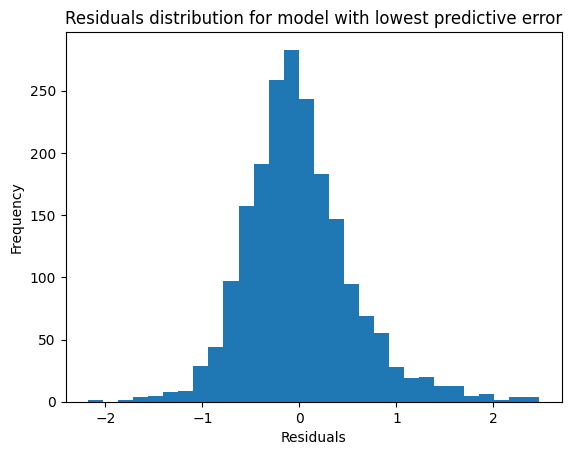

<Figure size 640x480 with 0 Axes>

In [ ]:
# Sort the results by RMSE in ascending order
sorted_results = results_df.sort_values(by='RMSE', ascending=True)

# Get the second-best specification
best_spec = sorted_results.iloc[0]  # The second row corresponds to the second-best specification
print(f"Best specification: {best_spec}")

# Residual Analysis for the Second-Best Model
best_features = best_spec['Specification']
model = LinearRegression()
model.fit(X_train[best_features], y_train)
residuals = y_test - model.predict(X_test[best_features])

# Examine residuals distribution
import matplotlib.pyplot as plt
plt.hist(residuals, bins=30)
plt.title("Residuals distribution for model with lowest predictive error")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [18]:

print(best_spec)


Specification    [sex, age, age_squared, maxEducLevel, relab, p...
RMSE                                                      0.560027
Name: 0, dtype: object


Second-best specification: Specification    [sex, age, maxEducLevel, relab, p6050, college...
RMSE                                                      0.563018
Name: 1, dtype: object


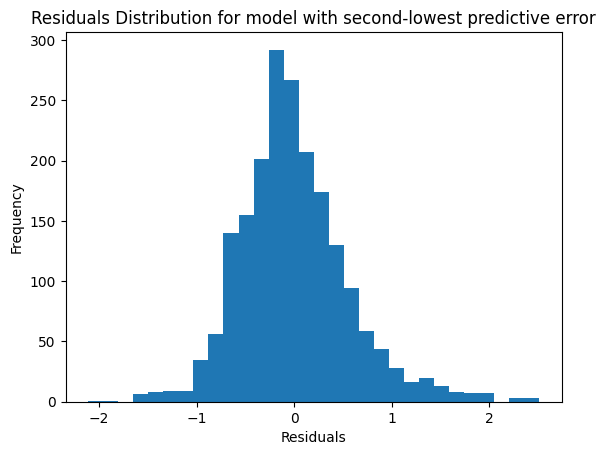

<Figure size 640x480 with 0 Axes>

In [ ]:
# Sort the results by RMSE in ascending order
sorted_results = results_df.sort_values(by='RMSE', ascending=True)

# Get the second-best specification
second_best_spec = sorted_results.iloc[1]  # The second row corresponds to the second-best specification
print(f"Second-best specification: {second_best_spec}")

# Residual Analysis for the Second-Best Model
second_best_features = second_best_spec['Specification']
model = LinearRegression()
model.fit(X_train[second_best_features], y_train)
residuals = y_test - model.predict(X_test[second_best_features])

# Examine residuals distribution
import matplotlib.pyplot as plt
plt.hist(residuals, bins=30)
plt.title("Residuals Distribution for model with second-lowest predictive error")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


## Cross Validation

C:\Users\ferma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ferma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ferma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea


Distribución de RMSE de predicción (LOOCV):

count    9963.000000
mean        0.413989
std         0.379552
min         0.000053
25%         0.144435
50%         0.317824
75%         0.562306
max         4.061371
dtype: float64


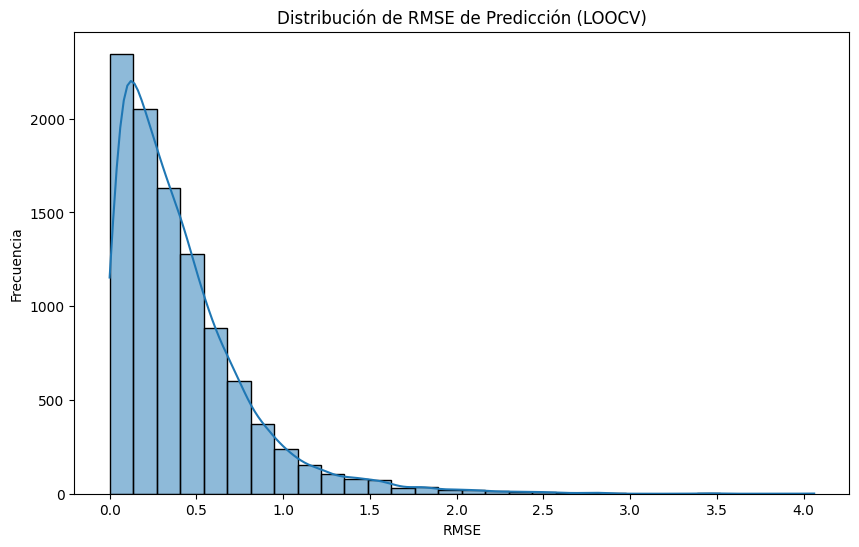


Número de outliers (RMSE > 3σ): 497
Índices de los outliers: [  77  108  109  110  112  117  127  133  178  180  181  198  200  210
  246  309  320  339  346  374  384  399  490  533  583  621  646  654
  663  677  684  758  776  946  971  983  986  993 1001 1002 1023 1040
 1051 1052 1057 1098 1105 1122 1123 1141 1150 1153 1168 1169 1240 1298
 1323 1349 1350 1353 1356 1357 1358 1361 1368 1369 1375 1392 1412 1460
 1499 1502 1513 1529 1535 1538 1546 1548 1565 1598 1658 1730 1733 1734
 1752 1762 1770 1776 1781 1783 1786 1800 1859 1860 1865 1884 1886 1912
 1916 1925 1930 1984 2022 2036 2039 2045 2063 2069 2075 2090 2102 2145
 2168 2202 2206 2281 2384 2404 2405 2414 2424 2490 2519 2631 2638 2748
 2754 2765 2814 2872 2890 2892 2896 2906 2907 2930 2997 3032 3045 3138
 3146 3147 3158 3162 3175 3211 3212 3246 3300 3331 3345 3362 3364 3372
 3375 3384 3393 3456 3471 3472 3483 3485 3501 3505 3541 3580 3614 3633
 3687 3747 3748 3755 3760 3800 3811 3816 3817 3825 3834 3835 3839 3842
 3850 3860 3894

In [20]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
import seaborn as sns

# Mejor especificación identificada previamente
best_spec = ["sex", "age", "age_squared", "maxEducLevel", "relab", "p6050", "college", "depto", "sizeFirm", "formal"]
X_best = X[best_spec]

# Inicializar modelo y estrategia LOOCV
model = LinearRegression()
loo = LeaveOneOut()

# Usar cross_val_score con LOOCV y RMSE como métrica
scorer = make_scorer(mean_squared_error, squared=False)  # RMSE
rmse_scores = cross_val_score(model, X_best, y, cv=loo, scoring=scorer)

# Análisis de los errores (RMSE)
print("\nDistribución de RMSE de predicción (LOOCV):\n")
print(pd.Series(rmse_scores).describe())

# Visualizar la distribución de errores
plt.figure(figsize=(10, 6))
sns.histplot(rmse_scores, kde=True, bins=30)
plt.title("Distribución de RMSE de Predicción (LOOCV)")
plt.xlabel("RMSE")
plt.ylabel("Frecuencia")
plt.show()

# Identificar outliers (RMSE > 3σ)
threshold = 3 * np.std(rmse_scores)
outliers = np.where(np.abs(rmse_scores) > threshold)[0]

print(f"\nNúmero de outliers (RMSE > 3σ): {len(outliers)}")
print(f"Índices de los outliers: {outliers}")

C:\Users\ferma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ferma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ferma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mea


Distribución de RMSE de predicción (LOOCV):

count    9963.000000
mean        0.415384
std         0.381857
min         0.000048
25%         0.143770
50%         0.317969
75%         0.573612
max         4.209053
dtype: float64


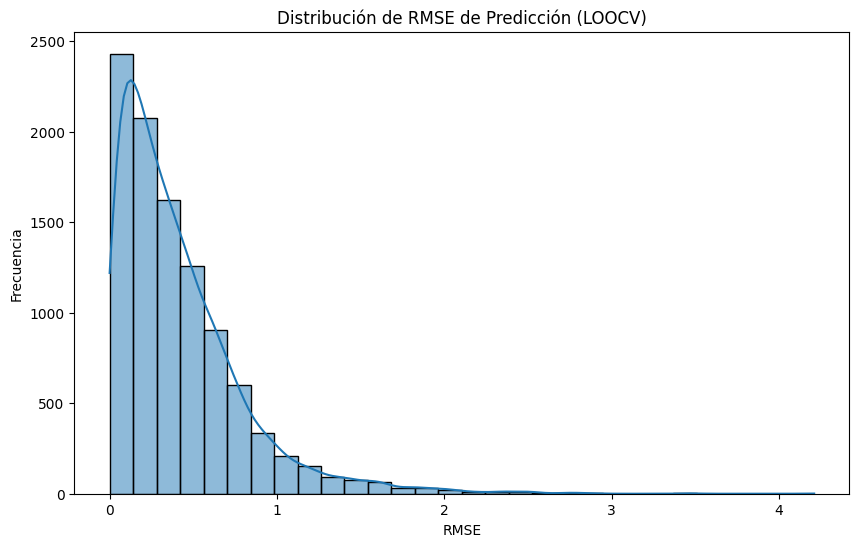


Número de outliers (RMSE > 3σ): 494
Índices de los outliers: [  77  108  109  110  112  117  127  133  178  180  181  198  200  210
  246  309  320  339  346  374  384  399  490  533  583  621  646  654
  663  684  758  946  971  977  986  993 1002 1023 1040 1051 1052 1057
 1098 1105 1122 1123 1141 1150 1153 1168 1169 1240 1298 1323 1349 1350
 1353 1356 1357 1358 1361 1368 1369 1375 1392 1412 1460 1499 1502 1513
 1529 1535 1538 1546 1548 1565 1593 1598 1658 1730 1733 1734 1752 1762
 1770 1776 1781 1783 1786 1800 1834 1859 1860 1865 1884 1886 1912 1916
 1925 1930 2022 2036 2039 2045 2063 2069 2075 2090 2102 2168 2202 2281
 2384 2404 2405 2414 2424 2490 2519 2638 2661 2748 2754 2765 2768 2814
 2872 2879 2890 2892 2896 2906 2907 2930 2997 3032 3045 3138 3142 3147
 3158 3162 3175 3211 3212 3246 3300 3331 3345 3362 3364 3372 3375 3384
 3393 3456 3472 3485 3501 3505 3541 3580 3614 3633 3687 3747 3748 3755
 3760 3800 3811 3816 3817 3825 3834 3835 3839 3842 3847 3850 3860 3894
 3900 3907 3912

In [21]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
import seaborn as sns

# Mejor especificación identificada previamente
second_best_spec = ["sex", "age", "maxEducLevel", "relab", "p6050", "college", "depto", "sizeFirm", "formal"]
X_best = X[second_best_spec]

# Inicializar modelo y estrategia LOOCV
model = LinearRegression()
loo = LeaveOneOut()

# Usar cross_val_score con LOOCV y RMSE como métrica
scorer = make_scorer(mean_squared_error, squared=False)  # RMSE
rmse_scores = cross_val_score(model, X_best, y, cv=loo, scoring=scorer)

# Análisis de los errores (RMSE)
print("\nDistribución de RMSE de predicción (LOOCV):\n")
print(pd.Series(rmse_scores).describe())

# Visualizar la distribución de errores
plt.figure(figsize=(10, 6))
sns.histplot(rmse_scores, kde=True, bins=30)
plt.title("Distribución de RMSE de Predicción (LOOCV)")
plt.xlabel("RMSE")
plt.ylabel("Frecuencia")
plt.show()

# Identificar outliers (RMSE > 3σ)
threshold = 3 * np.std(rmse_scores)
outliers = np.where(np.abs(rmse_scores) > threshold)[0]

print(f"\nNúmero de outliers (RMSE > 3σ): {len(outliers)}")
print(f"Índices de los outliers: {outliers}")